<a href="https://colab.research.google.com/github/ddmrcn/data4you_Data-Analysis-and-Machine-Learning-Projects/blob/master/Diabetes_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [54]:
df=pd.read_csv("diabetes.csv")

In [ ]:
df.head(5)

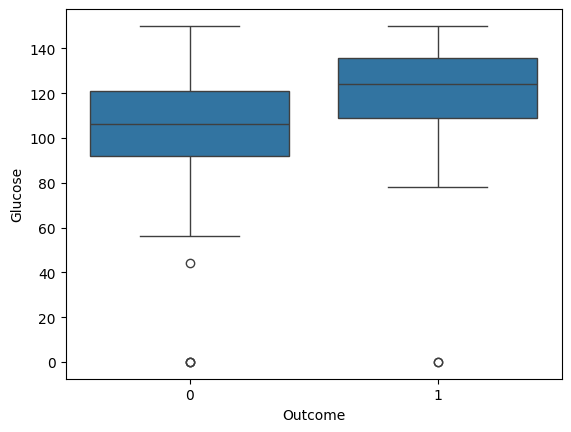

In [53]:
sns.boxplot(data=df, x="Outcome", y="Glucose")
plt.show()

In [ ]:
sns.boxplot(data=df, x="Outcome",y="BloodPressure")
plt.show()

In [ ]:
sns.boxplot(data=df, x="Outcome" ,y="SkinThickness")
plt.show()

In [ ]:
sns.boxplot(data=df,x="Outcome",y="Insulin")
plt.show()

In [ ]:
sns.boxplot(data=df,x="Outcome",y="BMI")
plt.show()

In [ ]:
sns.boxplot(data=df,x="Outcome",y="DiabetesPedigreeFunction")
plt.show()

In [ ]:
sns.boxplot(data=df,x="Outcome",y="Age")
plt.show()

In [ ]:
sns.boxplot(data=df,x="Outcome",y="Pregnancies")
plt.show()

In [56]:
corr_matrix=df.corr()

In [ ]:
print(corr_matrix)

In [59]:
y=df["Outcome"]

In [60]:
X=df.drop("Outcome",axis=1)

In [62]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [76]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest parametric": RandomForestClassifier(n_estimators= 60, criterion = "gini"),

}

In [77]:
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Classification Report": report,
        "FPR": fpr,
        "TPR": tpr,
        "AUC": roc_auc
    })


In [ ]:
results[0].keys()

print(results[0]['TPR'])


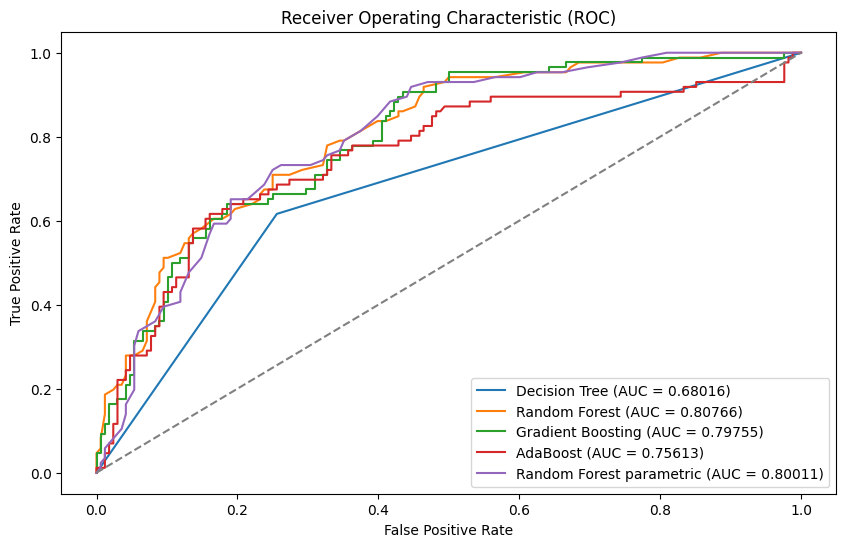

In [79]:
plt.figure(figsize=(10, 6))

for result in results:
    plt.plot(result['FPR'], result['TPR'], label=f"{result['Classifier']} (AUC = {result['AUC']:.5f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()# Plot ROC curves
